# ARIMA model 

- Temperature Dataset

### Step 1: Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the dataset

In [2]:
# Load the dataset
data = pd.read_csv('c:\\Users\HP\\Downloads\\temperature-1.csv')

### Step 3: Data Preprocessing

In [3]:
# Convert the 'Datetime' column to a datetime object
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')

# Set the 'Datetime' column as the DataFrame index
data.set_index('Datetime', inplace=True)


### Step 4: Data Visualization

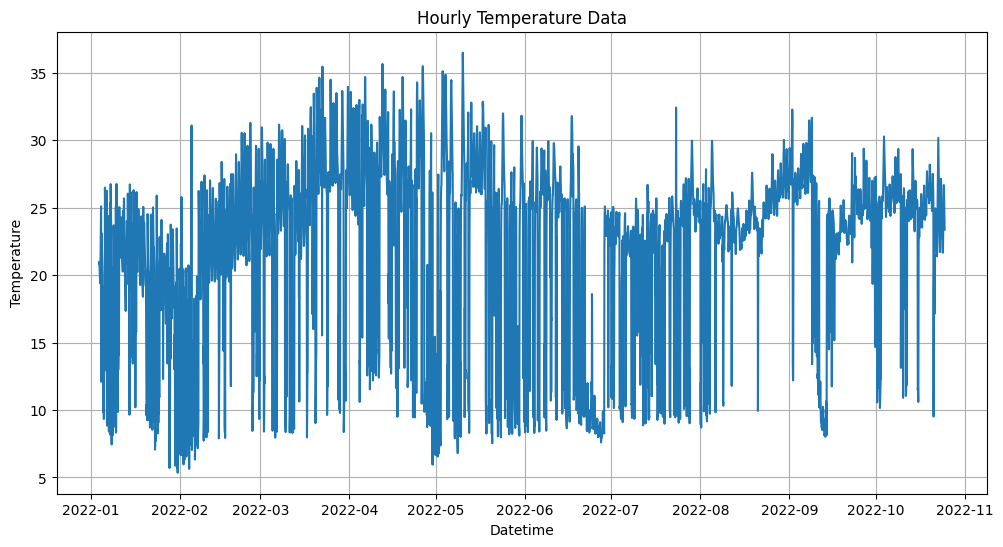

In [4]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'])
plt.title('Hourly Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()


### Step 5: Check Stationarity

In [5]:
# Define a function to check stationarity and perform differencing
def test_stationarity(timeseries):
    # Dickey-Fuller test
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value

    return dfoutput

# Check stationarity
result = test_stationarity(data['Hourly_Temp'])
print("Augmented Dickey-Fuller Test:")
print(result)

Augmented Dickey-Fuller Test:
Test Statistic                -9.396891e+00
p-value                        6.338903e-16
#Lags Used                     2.500000e+01
Number of Observations Used    7.030000e+03
Critical Value (1%)           -3.431281e+00
Critical Value (5%)           -2.861951e+00
Critical Value (10%)          -2.566989e+00
dtype: float64


### Step 6: Perform Differencing

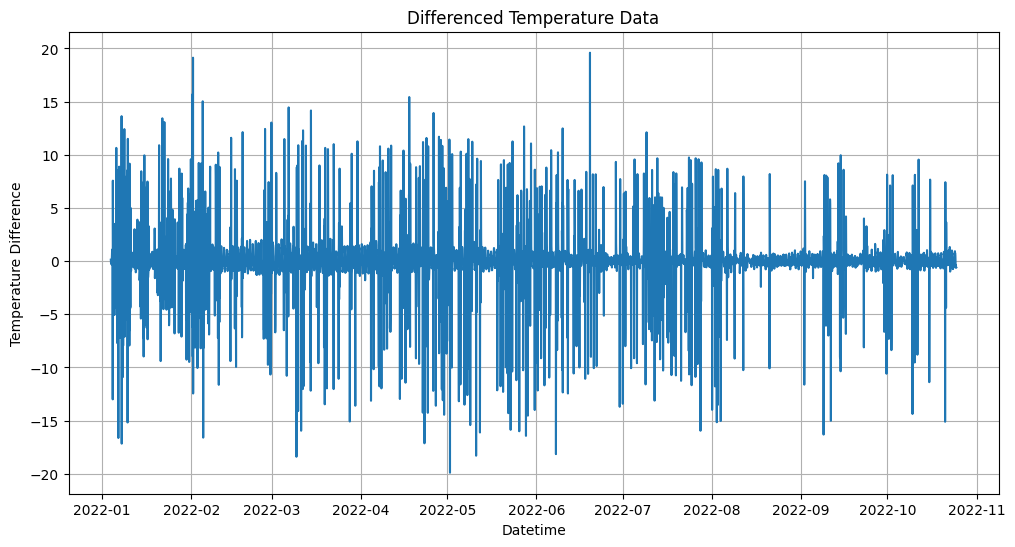

In [6]:
# Differencing to make the series stationary
data['Temp_Diff'] = data['Hourly_Temp'] - data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(data['Temp_Diff'])
plt.title('Differenced Temperature Data')
plt.xlabel('Datetime')
plt.ylabel('Temperature Difference')
plt.grid(True)
plt.show()

### Step 7: Check Stationarity of Differenced Data

In [7]:
# Check stationarity of differenced data
result = test_stationarity(data['Temp_Diff'])
print("Augmented Dickey-Fuller Test on Differenced Data:")
print(result)

Augmented Dickey-Fuller Test on Differenced Data:
Test Statistic                  -20.546080
p-value                           0.000000
#Lags Used                       35.000000
Number of Observations Used    7019.000000
Critical Value (1%)              -3.431282
Critical Value (5%)              -2.861952
Critical Value (10%)             -2.566989
dtype: float64


### Step 8: Fit SARIMA Model

In [8]:
# Fit SARIMA model
model = SARIMAX(data['Hourly_Temp'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))
results = model.fit(disp=False)

### Step 9: Forecast Future Values

In [9]:
# Forecast future values
forecast_steps = 24  # Adjust this as needed
forecast = results.get_forecast(steps=forecast_steps)


### Step 10: Create Date Range for Forecasting

In [10]:
# Create a date range for forecasting
date_range = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='H')

### Step 11: Get Forecasted Values and Confidence Intervals

In [11]:
# Get forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

### Step 12: Create a Forecast DataFrame

In [12]:
# Create a forecast DataFrame
forecast_df = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_conf_int.iloc[:, 0], 'Upper_CI': forecast_conf_int.iloc[:, 1]}, index=date_range[1:])

### Step 13: Plot the Original Data and the Forecast

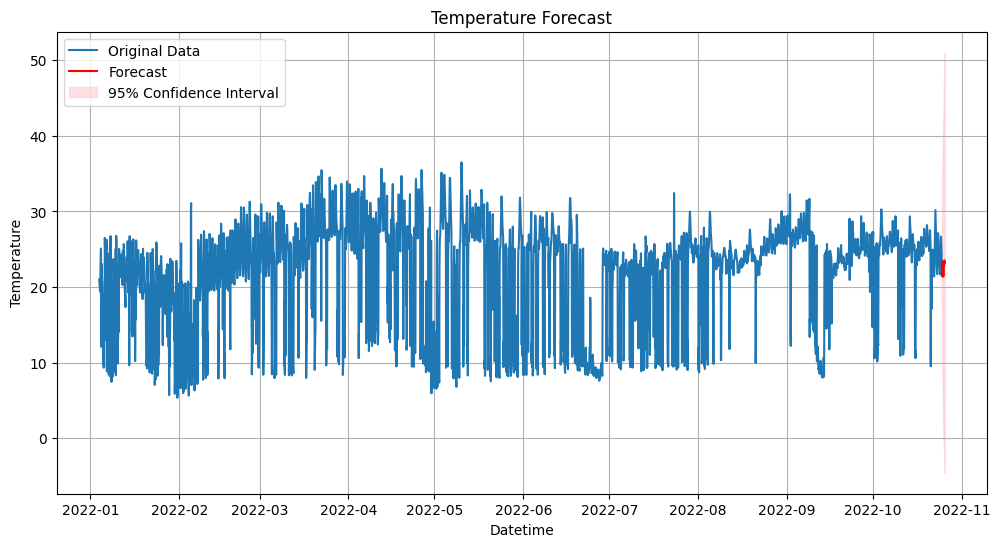

In [13]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Hourly_Temp'], label='Original Data')
plt.plot(forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df['Lower_CI'], forecast_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
data['Hourly_Temp_avg'] = data['Hourly_Temp'].mean()

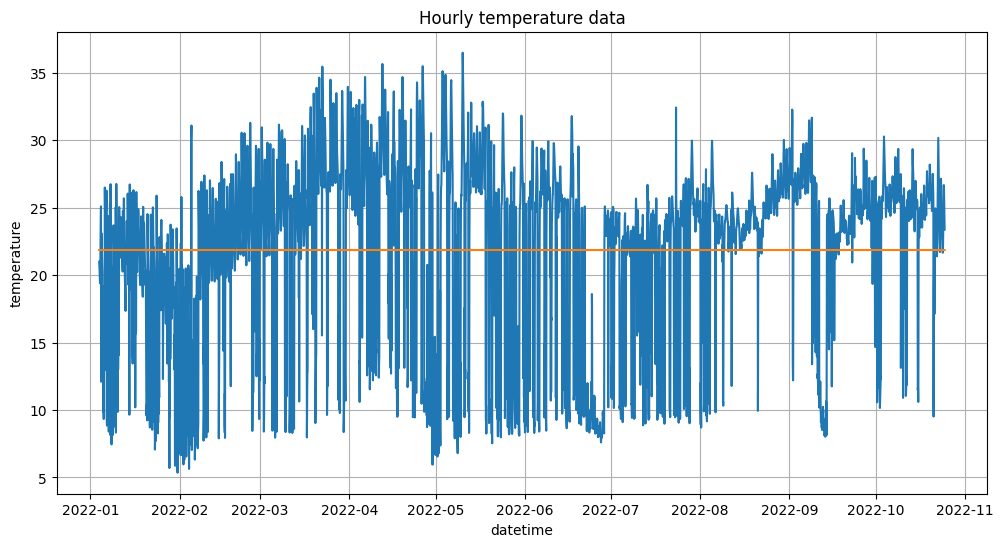

In [16]:
# plot the data 
plt.figure(figsize=(12,6))
plt.plot(data['Hourly_Temp'])
plt.plot(data['Hourly_Temp_avg'])
plt.title('Hourly temperature data')
plt.xlabel('datetime')
plt.ylabel('temperature')
plt.grid(True)
plt.show()

In [17]:
data['Hourly_Temp_movavg'] = data['Hourly_Temp'].rolling(720).mean()

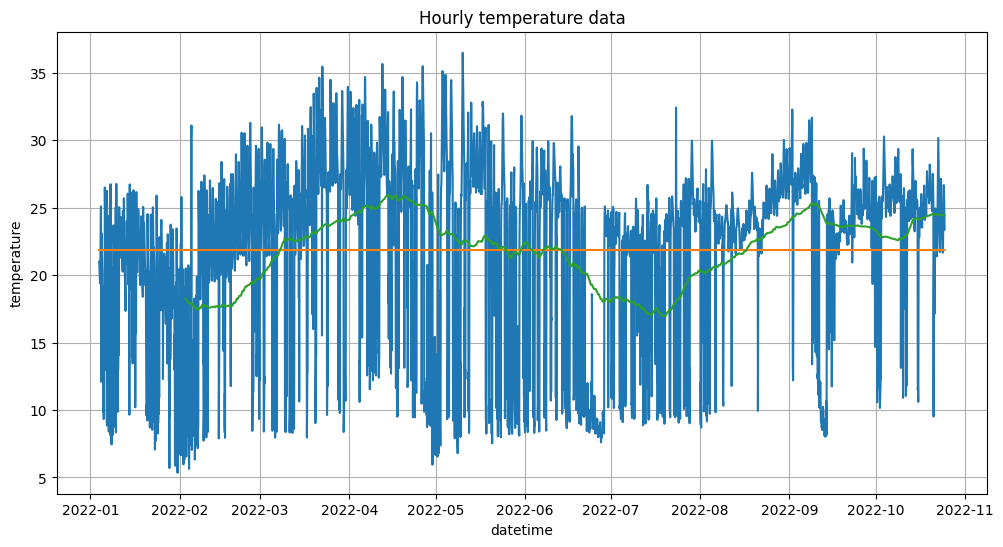

In [18]:
# plot the data 
plt.figure(figsize=(12,6))
plt.plot(data['Hourly_Temp'])
plt.plot(data['Hourly_Temp_avg'])
plt.plot(data['Hourly_Temp_movavg'])
plt.title('Hourly temperature data')
plt.xlabel('datetime')
plt.ylabel('temperature')
plt.grid(True)
plt.show()

In [20]:
import itertools 
# define the p,d and q parameters to take any values between 0 and 2 
p = d = q = range(0,2)

# Genrate all Different combinations p,d,q triplets 
pdq= list(itertools.product(p,d,q))

# Genrate all different combinations of seasonal p,d and q triplets 
seasnoal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]

In [21]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [22]:
seasnoal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [23]:
best_aic = np.inf
best_pdq=None
best_seasnoal_pdq = None
temp_model=None

In [24]:
for param in pdq:
    for param_seasonal in seasnoal_pdq:

        try:
            temp_model = SARIMAX(data['Hourly_Temp'],
                                 order=param,
                                 seasonal_order=param_seasonal,
                                 enforce_stationarity=True)
            
            results = temp_model.fit()

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasnoal_pdq = param_seasonal
        except:
            print('error')
            continue
print('Best SARIMAX{}x{}12 model - AIC:{}'.format(best_pdq,best_seasnoal_pdq,best_aic))

Best SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 model - AIC:33846.553852086814


In [25]:
best_model = SARIMAX(data['Hourly_Temp'],
                                 order=(1,0,1),
                                 seasonal_order=(1,1,1,12),
                                 enforce_stationarity=True)

best_results = best_model.fit()

In [27]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                     SARIMAX Results                                      
Dep. Variable:                        Hourly_Temp   No. Observations:                 7055
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -16918.277
Date:                            Tue, 22 Oct 2024   AIC                          33846.554
Time:                                    16:46:52   BIC                          33880.853
Sample:                                01-04-2022   HQIC                         33858.369
                                     - 10-24-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8831      0.006    138.073      0.000       0.871       0.896
ma.L1          0.1314      0.008   

In [29]:
# Forecast Future Values 
Fc_steps = 48
fc = results.get_forecast(steps=Fc_steps)

In [30]:
# Create Data range for forecasting

dr = pd.date_range(start=data.index[-1],periods=Fc_steps + 1, freq='H')

In [31]:
# Get forecasting values and confidence intervel 
fc_values = fc.predicted_mean
fc_conf_int = fc.conf_int()

In [32]:
fc_conf_int

,lower Hourly_Temp,upper Hourly_Temp
2022-10-25 00:00:00,17.677939,28.433842
2022-10-25 01:00:00,15.001214,30.823551
2022-10-25 02:00:00,12.295189,31.877250
2022-10-25 03:00:00,10.820583,33.551385
2022-10-25 04:00:00,10.013506,35.506879
2022-10-25 05:00:00,9.074403,37.058960
2022-10-25 06:00:00,7.948819,38.220238
2022-10-25 07:00:00,7.065679,39.462936
2022-10-25 08:00:00,6.194992,40.586933
2022-10-25 09:00:00,5.535177,41.812290


In [33]:
# Create a forecast DataFrame
fc_df = pd.DataFrame({'Forecast': fc_values, 'Lower_CI': fc_conf_int.iloc[:, 0], 'Upper_CI': fc_conf_int.iloc[:, 1]}, index=dr[1:])

In [34]:
fc_df

,Forecast,Lower_CI,Upper_CI
2022-10-25 00:00:00,23.055891,17.677939,28.433842
2022-10-25 01:00:00,22.912382,15.001214,30.823551
2022-10-25 02:00:00,22.086220,12.295189,31.877250
2022-10-25 03:00:00,22.185984,10.820583,33.551385
2022-10-25 04:00:00,22.760192,10.013506,35.506879
2022-10-25 05:00:00,23.066681,9.074403,37.058960
2022-10-25 06:00:00,23.084529,7.948819,38.220238
2022-10-25 07:00:00,23.264308,7.065679,39.462936
2022-10-25 08:00:00,23.390962,6.194992,40.586933
2022-10-25 09:00:00,23.673734,5.535177,41.812290


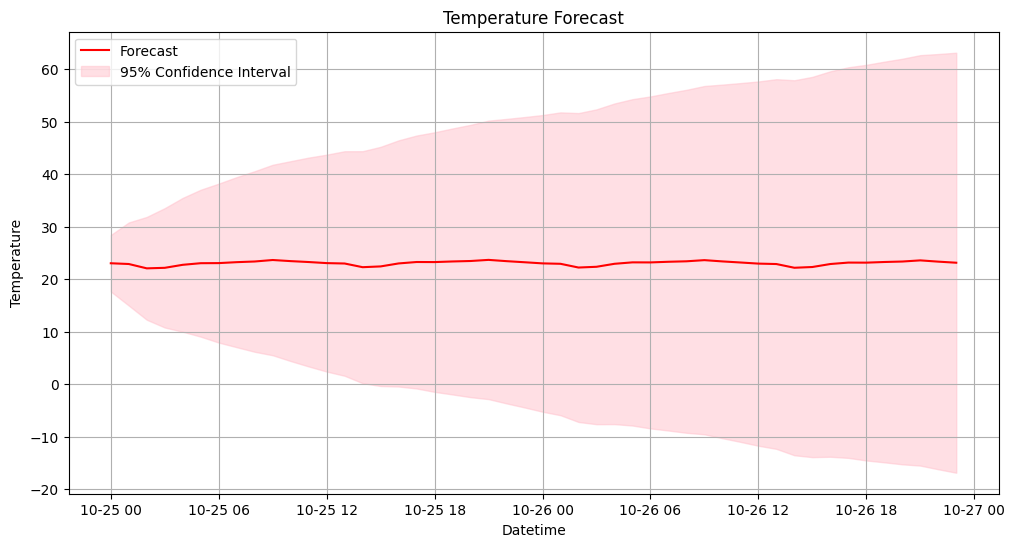

In [36]:
# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
#plt.plot(data['Hourly_Temp'], label='Original Data')
plt.plot(fc_df['Forecast'], label='Forecast', color='red')
plt.fill_between(fc_df.index, fc_df['Lower_CI'], fc_df['Upper_CI'], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.title('Temperature Forecast')
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()